<a href="https://colab.research.google.com/github/kamranjaved/Global-SNS-Event/blob/master/Tsunami_prediction_using_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_in=pd.read_csv('/content/drive/My Drive/civil/input.csv')
df_out=pd.read_csv('/content/drive/My Drive/civil/output.csv')
# test=pd.read_csv('/content/drive/My Drive/test.csv')

In [3]:
# use mlp for prediction on multi-output regression
import numpy as np
from numpy import asarray
from sklearn.datasets import make_regression
from keras.models import Sequential
from keras.layers import Dense

import matplotlib.pyplot as plt

In [4]:
X = df_in
y = df_out

In [5]:

# load dataset
# X, y = get_dataset()
n_inputs, n_outputs = X.shape[1], y.shape[1]

In [6]:
 print(X.shape)
 print(n_inputs)
 print(y.shape)
 print(n_outputs)

(44, 8)
8
(44, 2388)
2388


In [7]:
X.head()

,H (km),Theta (degrees),Delta (degrees),Lambda (degrees),L (km),W (km),D (m),M
0,2.4,201,45,76,21.6,17.9,3.70,7.4
1,2.0,189,45,77,20.9,18.4,3.75,7.4
2,4.0,2,30,104,29.2,27.9,4.78,7.6
3,3.4,194,45,98,73.2,20.6,3.94,7.5
4,4.2,180,45,67,78.1,19.5,3.97,7.5


In [10]:

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(200, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(200, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, kernel_initializer='he_uniform', activation='linear'))
	model.compile(loss='mae', optimizer='adam')
	return model


In [11]:

print(model.summary())

NameError: ignored

In [ ]:

# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=0, epochs=1000)


In [ ]:
# make a prediction for new data
#row = [-0.99859353,2.19284309,-0.42632569,-0.21043258,-1.13655612,-0.55671602,-0.63169045,-0.87625098,-0.99445578,-0.3677487]
newX = X[1:2] #asarray([row])
yhat = model.predict(newX)
print(newX)
print('Predicted: %s' % yhat[0])

   H (km)  Theta (degrees)  Delta (degrees)  ...  W (km)  D (m)    M
1     2.0              189               45  ...    18.4   3.75  7.4

[1 rows x 8 columns]
Predicted: [0.31779432 0.31773952 0.3135299  ... 0.20920125 0.20757622 0.20567705]


In [ ]:
# make a prediction for new data
#row = [-0.99859353,2.19284309,-0.42632569,-0.21043258,-1.13655612,-0.55671602,-0.63169045,-0.87625098,-0.99445578,-0.3677487]
newX = X[4:5] #asarray([row])
yhat1 = model.predict(newX)
print(newX)
print('Predicted: %s' % yhat1[0])

   H (km)  Theta (degrees)  Delta (degrees)  ...  W (km)  D (m)    M
4     4.2              180               45  ...    19.5   3.97  7.5

[1 rows x 8 columns]
Predicted: [0.31779432 0.31773952 0.3135299  ... 0.20920125 0.20757622 0.20567705]


In [ ]:
print(yhat[0]-yhat1[0])

[0. 0. 0. ... 0. 0. 0.]


In [8]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#X, y = make_regression(n_samples=10, n_targets=3, random_state=1)

In [9]:
MoR = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [24]:
MoR.fit(X_train, y_train)

MultiOutputRegressor(estimator=GradientBoostingRegressor(alpha=0.9,
                                                         ccp_alpha=0.0,
                                                         criterion='friedman_mse',
                                                         init=None,
                                                         learning_rate=0.1,
                                                         loss='ls', max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_

In [25]:
outs = MoR.predict(X_test)

In [26]:
mean_squared_error(y_test, outs)

0.09039753543751938

In [27]:
r2_score(y_test, outs)

0.18887288121502044

In [28]:
mean_absolute_error(y_test, outs)

0.19262190051461092

# **THE END**

In [29]:
outs = np.round(outs,5)
print(outs)

[[0.18757 0.18757 0.15244 ... 0.15285 0.16975 0.13434]
 [0.33517 0.33517 0.31871 ... 0.2567  0.23926 0.23309]
 [0.68966 0.68966 0.64188 ... 0.45987 0.45794 0.44326]
 ...
 [1.13217 1.13217 1.11698 ... 0.45379 0.44813 0.44329]
 [0.30223 0.30223 0.2915  ... 0.25522 0.25193 0.24481]
 [0.34014 0.34014 0.33345 ... 0.22934 0.2009  0.20804]]


In [30]:
print(y_test)

          0        1        2        3  ...     2384     2385     2386     2387
37  0.69528  0.69528  0.68020  0.65403  ...  0.26205  0.25590  0.24963  0.24282
24  0.72157  0.72157  0.70893  0.68844  ...  0.42088  0.41848  0.41621  0.41443
25  0.19536  0.19536  0.19296  0.19016  ...  0.14612  0.14596  0.14580  0.14529
36  0.28087  0.28087  0.27673  0.26810  ...  0.15438  0.15348  0.15166  0.14903
34  0.08456  0.08456  0.08373  0.08246  ...  0.07499  0.07440  0.07358  0.07289
40  0.12452  0.12452  0.12245  0.11903  ...  0.14491  0.14425  0.14332  0.14229
4   0.26836  0.26836  0.26452  0.25855  ...  0.12967  0.12872  0.12788  0.12718
12  0.67414  0.67414  0.67126  0.66837  ...  0.32798  0.32692  0.32919  0.33154
8   1.20598  1.20598  1.18467  1.14592  ...  0.40987  0.40445  0.40223  0.40237
3   0.26385  0.26385  0.25802  0.24963  ...  0.09902  0.09723  0.09540  0.09376
6   0.11585  0.11585  0.11367  0.11042  ...  0.08653  0.08466  0.08269  0.08044

[11 rows x 2388 columns]


In [38]:
Dev1 = pd.DataFrame(outs)
Dev1.to_csv('/content/drive/My Drive/civil/D1.csv')
Dev2 = pd.DataFrame(y_test)
Dev2.to_csv('/content/drive/My Drive/civil/D2.csv')

In [43]:
D1=pd.read_csv('/content/drive/My Drive/civil/D1.csv')
D2=pd.read_csv('/content/drive/My Drive/civil/D2.csv')

In [44]:
print(D1)

    Unnamed: 0        0        1        2  ...     2384     2385     2386     2387
0            0  0.18757  0.18757  0.15244  ...  0.12892  0.15285  0.16975  0.13434
1            1  0.33517  0.33517  0.31871  ...  0.28271  0.25670  0.23926  0.23309
2            2  0.68966  0.68966  0.64188  ...  0.48621  0.45987  0.45794  0.44326
3            3  0.16978  0.16978  0.14099  ...  0.10754  0.13380  0.13104  0.10733
4            4  0.09260  0.09260  0.11790  ...  0.04953  0.07301  0.06887  0.06739
5            5  0.19639  0.19639  0.18322  ...  0.11931  0.09136  0.10191  0.08000
6            6  0.59664  0.59664  0.54251  ...  0.30123  0.27154  0.31177  0.28826
7            7  0.67466  0.67466  0.67785  ...  0.35808  0.37107  0.32919  0.35684
8            8  1.13217  1.13217  1.11698  ...  0.46913  0.45379  0.44813  0.44329
9            9  0.30223  0.30223  0.29150  ...  0.26425  0.25522  0.25193  0.24481
10          10  0.34014  0.34014  0.33345  ...  0.24400  0.22934  0.20090  0.20804

[11

In [42]:
print(D2)

    Unnamed: 0        0        1        2  ...     2384     2385     2386     2387
0           37  0.69528  0.69528  0.68020  ...  0.26205  0.25590  0.24963  0.24282
1           24  0.72157  0.72157  0.70893  ...  0.42088  0.41848  0.41621  0.41443
2           25  0.19536  0.19536  0.19296  ...  0.14612  0.14596  0.14580  0.14529
3           36  0.28087  0.28087  0.27673  ...  0.15438  0.15348  0.15166  0.14903
4           34  0.08456  0.08456  0.08373  ...  0.07499  0.07440  0.07358  0.07289
5           40  0.12452  0.12452  0.12245  ...  0.14491  0.14425  0.14332  0.14229
6            4  0.26836  0.26836  0.26452  ...  0.12967  0.12872  0.12788  0.12718
7           12  0.67414  0.67414  0.67126  ...  0.32798  0.32692  0.32919  0.33154
8            8  1.20598  1.20598  1.18467  ...  0.40987  0.40445  0.40223  0.40237
9            3  0.26385  0.26385  0.25802  ...  0.09902  0.09723  0.09540  0.09376
10           6  0.11585  0.11585  0.11367  ...  0.08653  0.08466  0.08269  0.08044

[11

In [40]:
mean_squared_error(D2, D1)

0.3081001171233532

In [32]:
b = outs.flatten()
a = y_test.to_numpy()
a = a.flatten()
print('SAD',np.sum(np.abs(a - b)))
print('Mean',np.mean(b - a))
print("SSD:", np.sum(np.square(a - b)))
print("STD:", np.std(a - b))

SAD 5059.793
Mean 0.10445646490025887
SSD: 2374.5629778845996
STD: 0.2819333291050442


In [20]:
from scipy.spatial.distance import cdist
results =  cdist(y_test,outs,'euclidean')
print(results)

[[13.38197462  9.12067814 10.49911077 17.06794695 13.80544695 13.71189779
  10.23200093 17.30154912 34.58332379 10.44460862  9.20730552  8.14979246
  10.28812321  8.55390304 16.64273681]
 [14.656784   10.54820224  8.04216186 18.50718297 14.92638603 15.88106862
   8.57854432 15.76654318 31.59658533  7.52267804  8.92379801  8.23828322
   9.71695828  9.8810666  14.33382292]
 [ 7.31473252 11.92441512 22.79814816  1.96805397  4.86204132  5.66950196
  19.93721517 30.67005758 48.9557518  21.27857836 13.03961939 18.13823144
  12.00727273 11.29016528 30.3391257 ]
 [ 5.53048477  7.88221715 18.27690637  6.02861132  5.07142074  3.79076429
  15.55180043 26.47704426 44.87582617 17.03483832  8.91996733 13.51394138
   8.38811747  7.55190776 25.93263258]
 [ 9.0804001  13.89862294 25.02075947  3.31088056  7.20123051  7.25171922
  21.9983812  32.72996489 51.2115675  23.37083731 15.14909324 20.24314876
  14.08706995 13.54673174 32.50869986]
 [ 8.03167031 12.83588688 23.99203655  2.73024977  6.14892146  6.

In [ ]:

import matplotlib.pyplot as plt

In [ ]:
yhat = np.round(yhat,5)


In [ ]:
print(yhat.dtype)

float32


In [ ]:
a = y.to_numpy()

In [ ]:
print(yhat)

[[0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]
 [0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]
 [0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]
 ...
 [0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]
 [0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]
 [0.32405 0.32397 0.31849 ... 0.22345 0.22038 0.21663]]


In [ ]:
print(a)

[[0.20053 0.20053 0.1991  ... 0.08394 0.08256 0.08113]
 [0.29024 0.29024 0.28341 ... 0.22463 0.22115 0.21738]
 [0.26385 0.26385 0.25802 ... 0.09723 0.0954  0.09376]
 ...
 [0.23063 0.23063 0.23023 ... 0.20758 0.20572 0.20407]
 [0.09282 0.09282 0.09111 ... 0.06458 0.06349 0.06237]
 [0.35788 0.35788 0.35622 ... 0.33266 0.32728 0.32182]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: cycling among columns of inputs with non-matching shapes is deprecated.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.


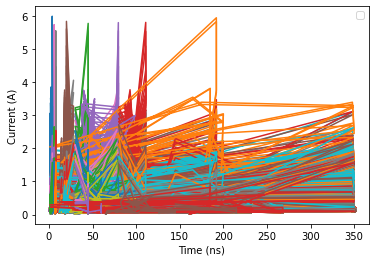

In [ ]:
plt.plot(newX, yhat, marker = '.') 
# plt.scatter(df.t, df.I2, marker = '.') 
# plt.scatter(df.t, df.I3, marker = '.') 
plt.plot(newX, y) 
# plt.scatter(x, output,  c="r", alpha=0.5, marker = '.', label="ANN pridected ESD Curve")
plt.xlabel("Time (ns)")
plt.ylabel("Current (A)")
plt.legend(loc='upper right')
plt.show()
